# MNIST - Categorical Classification

> # Convolutional Neural Network

In [1]:
import warnings
warnings.filterwarnings('ignore')

- import Tensorflow

In [2]:
import tensorflow

tensorflow.__version__

'2.12.0'

# I. MNIST Data_Set Load

In [3]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape, X_test.shape, y_train.shape, y_train.shape

11490434/11490434 [==============================] - 2s 0us/step


((60000, 28, 28), (10000, 28, 28), (60000,), (60000,))

# II. Data Preprocessing

> ## 1) Normalization

- 범위: 0 ~ 1

In [4]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

> ## 2) Reshape

 - (60000, 28, 28) to (60000, 28, 28, 1)

In [5]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

> ## 3) One Hot Encoding

In [6]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

> ## 4) train_test_split()

- Train(48,000) vs. Validation(12,000)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size = 0.2,
                                                      random_state = 2045)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

# III. MNIST Keras Modeling

> ## 1) Model Define

- Feature Extraction Layer

In [12]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(filters = 32, kernel_size = (3, 3),
                        strides = (1, 1), padding = 'valid',
                        activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPool2D(pool_size = (2, 2)))
model.add(layers.Conv2D(filters = 32, kernel_size = (3, 3),
                        strides = (1, 1), padding = 'valid',
                        activation = 'relu'))
model.add(layers.MaxPool2D(pool_size = (2, 2)))
model.add(layers.Conv2D(filters = 32, kernel_size = (3, 3),
                        strides = (1, 1), padding = 'valid',
                        activation = 'relu'))

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
Total params: 18,816
Trainable params: 18,816
Non-trai

- Classification Layer

In [14]:
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=64, activation = 'relu'))
model.add(layers.Dense(units=10, activation = 'softmax'))

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 flatten (Flatten)           (None, 288)              

> ## 2) Model Compile

- 모델 학습방법 설정

In [16]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

> ## 3) Model Fit

- 약 5분

In [17]:
%%time

Hist_mnist = model.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_data = (X_valid, y_valid))

Epoch 1/100
375/375 [==============================] - 14s 6ms/step - loss: 0.4638 - accuracy: 0.8522 - val_loss: 0.1230 - val_accuracy: 0.9645
Epoch 2/100
375/375 [==============================] - 3s 8ms/step - loss: 0.1412 - accuracy: 0.9554 - val_loss: 0.0781 - val_accuracy: 0.9766
Epoch 3/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0976 - accuracy: 0.9694 - val_loss: 0.0604 - val_accuracy: 0.9825
Epoch 4/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0837 - accuracy: 0.9739 - val_loss: 0.0565 - val_accuracy: 0.9834
Epoch 5/100
375/375 [==============================] - 3s 8ms/step - loss: 0.0701 - accuracy: 0.9784 - val_loss: 0.0549 - val_accuracy: 0.9845
Epoch 6/100
375/375 [==============================] - 3s 7ms/step - loss: 0.0652 - accuracy: 0.9795 - val_loss: 0.0458 - val_accuracy: 0.9867
Epoch 7/100
375/375 [==============================] - 3s 8ms/step - loss: 0.0601 - accuracy: 0.9814 - val_loss: 0.0438 - val_accuracy: 0.986

> ## 4) 학습 결과 시각화

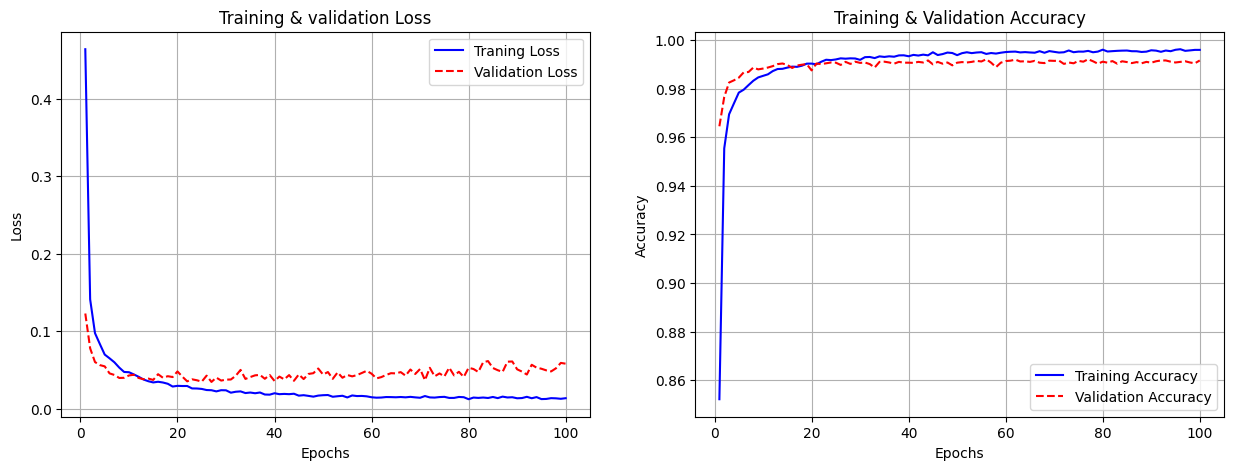

In [18]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_mnist.history['loss'], 'b-')
plt.plot(epochs, Hist_mnist.history['val_loss'], 'r--')
plt.title('Training & validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Traning Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_mnist.history['accuracy'] , 'b-')
plt.plot(epochs, Hist_mnist.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

> ## 5) Model Evaluate

- Loss & Accuracy

In [19]:
loss, accuracy = model.evaluate(X_test, y_test, verbose = 0)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 0.04185
Accuracy = 0.99270
